In [9]:
from collections import defaultdict
import itertools
class Ornamentation(object):
    def __init__(self, T, ornaments = None):
        self.T = T
        self.ornaments = dict()
        for u in self.T:
            self.ornaments[u] = {u}
        if ornaments is not None:
            self.ornaments = ornaments
    def __le__(self, other):
        for u in self.T:
            if not(self.ornaments[u].issubset(other.ornaments[u])):
                return False
        return True
    def __eq__(self, other):
        for u in self.T:
            if not(self.ornaments[u] == other.ornaments[u]):
                return False
        return True    
    def __lt__(self, other):
        return (self <= other) and (self != other)
    
    def __hash__(self):
        unhash = {hash(x):x for x in self.T}
        ornaments = []
        for v in sorted(unhash):
            ornaments.append((v, tuple(sorted(
                [hash(x) for x in self.ornaments[unhash[v]]]))))
        return hash(tuple(sorted(ornaments)))
    
    def __repr__(self):
        return str(self.ornaments)
    def __str__(self):
        return str(self.ornaments)

        
def get_ornamentations_lattice(Tree):
    #T must be a rooted tree with its minimal element at the bottom
    #The vertices of T must be hashable (e.g. integers)
        
    Tree = Poset(Tree)
    ornaments = []
    G = Tree.hasse_diagram().to_undirected()
    for H in G.connected_subgraph_iterator():
        m = Tree.subposet(H).minimal_elements()[0]
        ornaments.append((m, set(H)))
    base_set = set(Tree)
        
    unhash = dict()
    for x in base_set:
        unhash[hash(x)] = x
        
    new_ornaments = [(hash(orn[0]), {hash(y) for y in orn[1]}) for orn in ornaments]
    
    ornament_graph = defaultdict(list)
    for x, y in itertools.combinations(new_ornaments, r = 2):
        if x[0] == y[0]:
            continue
        
        S = set(x[1])
        T = set(y[1])
        compat = True
        if len(S.intersection(T)) == 0:
            ornament_graph[(x[0], tuple(sorted(x[1])))].append((y[0], tuple(sorted(y[1]))))
        if not((y[0] in S and not(T.issubset(S))) or (x[0] in T and not(S.issubset(T)))):
            ornament_graph[(x[0], tuple(sorted(x[1])))].append((y[0], tuple(sorted(y[1]))))
    ornamentations = Graph(ornament_graph).cliques_maximal()
    out = []
    for orn in ornamentations:
        obj = Ornamentation(Tree)
        for t in orn:
            obj.ornaments[unhash[t[0]]] = set([unhash[x] for x in t[1]])
        out.append(obj)
    d = dict()
    ornamentations = out
    for orn in ornamentations:
        d[orn] = []
    for o1 in ornamentations:
        for o2 in ornamentations:
            if o1 < o2:
                d[o1].append(o2)
                
    return LatticePoset(d)

In [72]:
# Question 1.2
d = dict()
d[0] = [1]
d[1] = [2, 3]
T = Poset(d)
G = T.hasse_diagram().to_undirected()
O = get_ornamentations_lattice(T)

print("Ornaments:", "\n")

for orn in G.connected_subgraph_iterator():
    print(list(orn))
    print("\n")

print("Ornamentations:", "\n")

for orn in O:
    print(orn)
    print("\n")

Ornaments: 

[0]


[0, 1]


[0, 1, 2]


[0, 1, 2, 3]


[0, 1, 3]


[1]


[1, 2]


[1, 2, 3]


[1, 3]


[2]


[3]


Ornamentations: 

{0: {0}, 1: {1}, 2: {2}, 3: {3}}


{0: {0}, 1: {1, 2}, 2: {2}, 3: {3}}


{0: {0}, 1: {1, 3}, 2: {2}, 3: {3}}


{0: {0}, 1: {1, 2, 3}, 2: {2}, 3: {3}}


{0: {0, 1}, 1: {1}, 2: {2}, 3: {3}}


{0: {0, 1, 2}, 1: {1}, 2: {2}, 3: {3}}


{0: {0, 1, 2}, 1: {1, 2}, 2: {2}, 3: {3}}


{0: {0, 1, 3}, 1: {1}, 2: {2}, 3: {3}}


{0: {0, 1, 3}, 1: {1, 3}, 2: {2}, 3: {3}}


{0: {0, 1, 2, 3}, 1: {1}, 2: {2}, 3: {3}}


{0: {0, 1, 2, 3}, 1: {1, 2}, 2: {2}, 3: {3}}


{0: {0, 1, 2, 3}, 1: {1, 3}, 2: {2}, 3: {3}}


{0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}




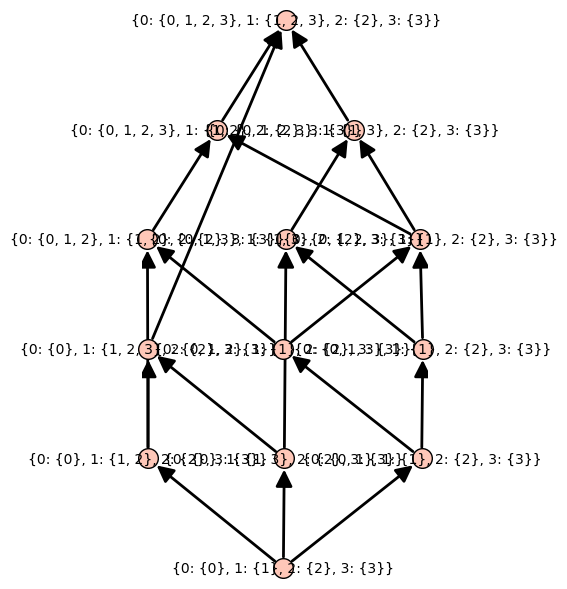

In [14]:
# Question 1.3
O.show(figsize = 8)

# Note: Dr. Sack and I went over this, and there is just a bug in the visual display of the Lattice

In [34]:
# Question 1.5

max_length = O.maximal_chain_length()
chains = O.maximal_chains()
for chain in chains:
    if len(chain) == max_length:
        print(chain)
        print("\n")   

[{0: {0}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1, 2}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1, 2}, 1: {1, 2}, 2: {2}, 3: {3}}, {0: {0, 1, 2, 3}, 1: {1, 2}, 2: {2}, 3: {3}}, {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}]


[{0: {0}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1, 2}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1, 2, 3}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1, 2, 3}, 1: {1, 2}, 2: {2}, 3: {3}}, {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}]


[{0: {0}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1, 2}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1, 2, 3}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1, 2, 3}, 1: {1, 3}, 2: {2}, 3: {3}}, {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}]


[{0: {0}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1, 3}, 1: {1}, 2: {2}, 3: {3}}, {0: {0, 1, 3}, 1: {1, 3}, 2: {2}, 3: {3}}, {0: {0, 1, 2, 3}, 1: {1, 3}, 2: {2}, 3: {3}}, {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: 

In [41]:
# Question 1.6

print("The unique minimal element of the lattice is", O.bottom(), "= O(min)")
print("\n")
print("The unique maximal element of the lattice is:", O.top(), "= O(max)")

The unique minimal element of the lattice is {0: {0}, 1: {1}, 2: {2}, 3: {3}} = O(min)


The unique maximal element of the lattice is: {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}} = O(max)


In [63]:
# Question 1.9

omega = Ornamentation(T, ornaments = {0:{0}, 1:{1, 2}, 2:{2}, 3:{3}})
sigma = Ornamentation(T, ornaments = {0:{0, 1}, 1:{1}, 2:{2}, 3:{3}})
print("The meet of Omega and Sigma is: ", O.meet(omega, sigma))
print("\n")
print("The join of Omega and Sigma is: ", O.join(sigma, omega))

The meet of Omega and Sigma is:  {0: {0}, 1: {1}, 2: {2}, 3: {3}}


The join of Omega and Sigma is:  {0: {0, 1, 2}, 1: {1, 2}, 2: {2}, 3: {3}}


In [ ]:
# Question 1.11

# See proof on paper worksheet, as it would make no sense to write it in code :)